In [1]:
from PIL import Image 
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.svm import LinearSVC, SVC

image (300, 400, 3)
bordes (300, 400)


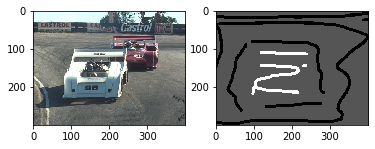

In [2]:
#image = np.array(Image.open("imagenes/images/flower.bmp"))
#bordes = np.array(Image.open("imagenes/bordes_mr/flower.bmp"))

image = Image.open("imagenes/images/21077.bmp")
bordes = Image.open("imagenes/bordes_mr/21077.bmp")
image = np.array(image)
bordes = np.array(bordes)

print('image',image.shape)
print('bordes',bordes.shape)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(bordes,cmap='gray')
plt.show()

In [3]:
nrows,ncols,nch = image.shape
Ximage = np.reshape(image,(nrows*ncols,3))
Xbordes = np.reshape(bordes,(nrows*ncols))
print('Ximage',Ximage.shape)
print('Xbordes',Xbordes.shape)

Ximage (120000, 3)
Xbordes (120000,)


In [4]:
np.unique(Xbordes)

array([ 64, 128, 255], dtype=uint8)

In [5]:
Xobj = Ximage[ Xbordes==255,:]
Xbck = Ximage[ Xbordes==64,:]
Yobj = np.ones(len(Xobj))*255
Ybck = np.ones(len(Xbck))*64

In [6]:
# Landmarks
Lobj = Xobj[np.random.permutation(len(Xobj))[:15],:]
Lbck = Xbck[np.random.permutation(len(Xbck))[:15],:]
L = np.concatenate((Lobj,Lbck))
print('L',L.shape)

L [[ 71  94 110]
 [155 162 144]
 [143 143 131]
 [255 240 225]
 [ 87 120 137]
 [113 123 114]
 [ 95 126 144]
 [ 98 110  98]
 [105 101  98]
 [ 77 106 122]
 [255 255 243]
 [255 255 255]
 [144 159 164]
 [114 151 157]
 [241 255 240]
 [ 79  83  84]
 [124 122 110]
 [ 99 101 100]
 [ 86  60  69]
 [136 137 132]
 [239 255 255]
 [ 94  96  93]
 [ 76  61  64]
 [107 110 115]
 [ 91 100 107]
 [ 75  79  80]
 [155 153 141]
 [ 98  93 100]
 [ 44  34  43]
 [117 121 120]]


In [7]:
gamma = -1/(3*np.var(Ximage))
n = len(Ximage)
XimageL = np.zeros((n,30))
for s in range(n):
    for l in range(30):
        sample = Ximage[s,:]
        land = L[l,:]
        XimageL[s,l] = math.exp(gamma*np.linalg.norm(sample-land)**2)
print('XimageL',XimageL.shape,XimageL)

XimageL (120000, 30) [[6.15004631e-04 6.97794454e-02 2.77095119e-02 ... 9.65626848e-04
  1.62410360e-06 6.88349028e-03]
 [5.04276546e-04 6.26456165e-02 2.44160221e-02 ... 8.03595409e-04
  1.25718616e-06 5.89448380e-03]
 [6.53695829e-04 7.30937782e-02 2.91882182e-02 ... 1.03079587e-03
  1.77669679e-06 7.28517557e-03]
 ...
 [1.08825591e-03 1.18188634e-06 1.58568347e-07 ... 9.82010456e-01
  2.75222631e-01 8.68642458e-09]
 [1.56529211e-03 2.58783008e-06 3.67458130e-07 ... 1.00600554e-06
  3.47095218e-01 2.17200478e-08]
 [1.75783311e-03 3.34310405e-06 4.83762765e-07 ... 1.25246856e-06
  3.73076231e-01 2.93288346e-08]]


In [8]:
idx = np.logical_or(Xbordes==64,Xbordes==255)
Xtrain = Ximage[idx,:]
Ytrain = Xbordes[idx]

XtrainL = XimageL[idx,:]

print('Xtrain',Xtrain.shape)
print('XtrainL',XtrainL.shape)
print('Ytrain',Ytrain.shape)

Xtrain (21718, 3)
XtrainL (21718, 30)
Ytrain (21718,)


In [9]:
model = LinearSVC()
model.fit(Xtrain,Ytrain)
label = model.predict(Ximage)

modelL = LinearSVC()
modelL.fit(XtrainL,Ytrain)
labelL = modelL.predict(XimageL)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [10]:
modelSVC = SVC()
modelSVC.fit(Xtrain,Ytrain)
labelSVC = modelSVC.predict(Ximage)

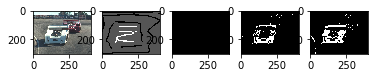

In [11]:
label = np.reshape(label,(nrows,ncols))
labelL = np.reshape(labelL,(nrows,ncols))
labelSVC = np.reshape(labelSVC,(nrows,ncols))

plt.figure()
plt.subplot(1,5,1)
plt.imshow(image)
plt.subplot(1,5,2)
plt.imshow(bordes,cmap='gray')
plt.subplot(1,5,3)
plt.imshow(label,cmap='gray')
plt.subplot(1,5,4)
plt.imshow(labelL,cmap='gray')
plt.subplot(1,5,5)
plt.imshow(labelSVC,cmap='gray')
plt.show()